# Titanic Decision Tree (Gini Index)
This notebook builds a simple decision tree to predict Titanic survival.

**Goal:** Understand how decision trees split data using **Gini impurity**.

## 1. Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

## 2. Load the Titanic Dataset
Seaborn includes a built-in Titanic dataset.

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Select Simple Features
We keep a few easy-to-understand variables.
- **survived** → target variable
- **pclass** → passenger class
- **sex** → gender
- **age** → age
- **sibsp** → siblings/spouses aboard
- **parch** → parents/children aboard
- **fare** → ticket price
- **embarked** → port of embarkation

In [3]:
cols = ['survived','pclass','sex','age','sibsp','parch','fare','embarked']
data = df[cols].copy()
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 4. Handle Missing Values
- Fill missing age with the median
- Fill missing embarked with the most common value

filling with median is not the best idea.

In [4]:
data['age'] = data['age'].fillna(data['age'].median())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
data.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0


## 5. Convert Categorical Variables
Decision trees require numeric inputs.
We convert text categories into numeric columns.

Don't scale, it would make it impossible to do calculations on the decision tree. Should encode tho.

In [5]:
X = pd.get_dummies(data.drop(columns=['survived']), drop_first=True)
y = data['survived']
X.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


## 6. Split into Training and Testing Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

## 7. Train a Decision Tree
We use:
- **criterion='gini'** → split using Gini impurity
- **max_depth=3** → keep the tree simple

Extended depth would be overfitting

In [7]:
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## 8. Evaluate the Model

In [8]:
y_pred = tree.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7847533632286996

Confusion Matrix:
 [[131   6]
 [ 42  44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85       137
           1       0.88      0.51      0.65        86

    accuracy                           0.78       223
   macro avg       0.82      0.73      0.75       223
weighted avg       0.80      0.78      0.77       223



## 9. Visualize the Decision Tree
The tree splits data to reduce **Gini impurity**.

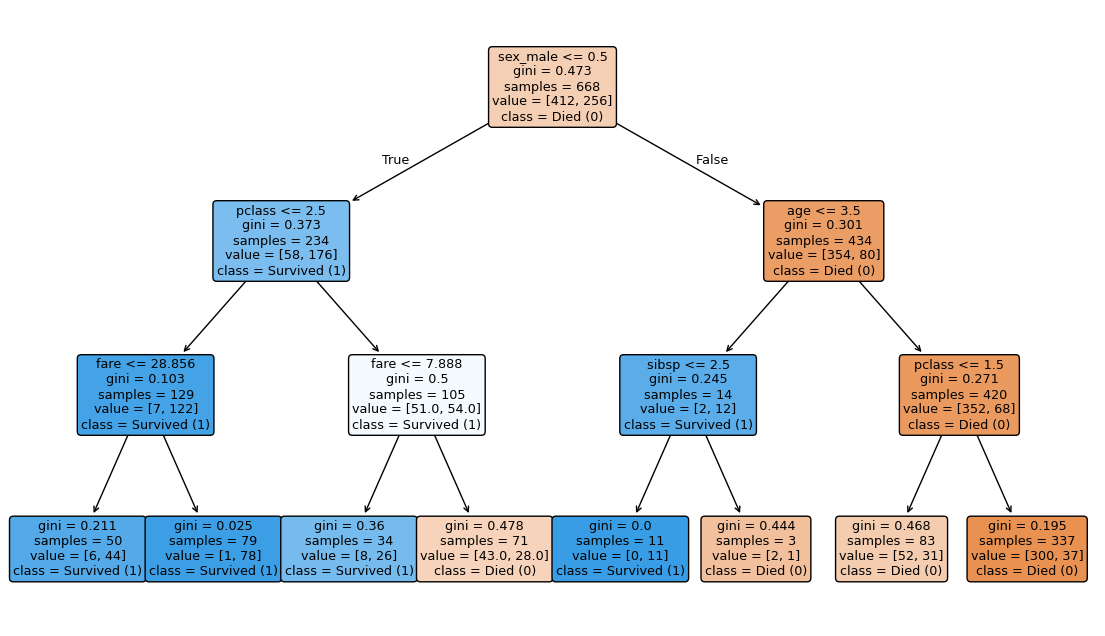

In [9]:
plt.figure(figsize=(14,8))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=['Died (0)','Survived (1)'],
    filled=True,
    rounded=True
)
plt.show()

## 10. Feature Importance
Shows which features influenced decisions the most.

In [10]:
importances = pd.Series(tree.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

,0
sex_male,0.649002
pclass,0.203994
age,0.086711
fare,0.046423
sibsp,0.013871
parch,0.000000
embarked_Q,0.000000
embarked_S,0.000000


### Key Takeaways
- Decision trees split data to create **pure groups**.
- Gini impurity measures how mixed a node is.
- Lower Gini = better split.
- Shallow trees are easier to interpret.